In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sys import platform
is_linux = (platform == "linux" or platform == "linux2")

from glob import glob
from os import listdir, mkdir, getcwd, remove
from os.path import isfile, join, basename, isdir

from analysis.split_event_tree import split_event_tree,ttype_column
from analysis.calc import calc_nll_llr_dtf_delta, get_kinematics, filter_for_tf
from analysis.plot_matplotlib import plot_hist

import os; print(os.environ['PATH']); print(os.environ['LD_LIBRARY_PATH'])
#from analysis.cffi.Physsim.CalculateME import lib as physsim
from analysis.cffi.mg5.lib import calc_zhh, calc_zzh
from tqdm.auto import tqdm

/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/bin:/nfs/dust/ilc/user/bliewert/.vscode-server/bin/863d2581ecda6849923a2118d93a088b0745d9d6/bin/remote-cli:/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/bin:/nfs/dust/ilc/user/bliewert/miniconda3/condabin:/usr/lib/heimdal/bin:/afs/desy.de/common/passwd:/usr/local/bin:/usr/bin:/afs/desy.de/user/b/bliewert/bin:/usr/local/sbin:/usr/sbin:/opt/puppetlabs/bin
/afs/desy.de/user/b/bliewert/public/ILCSoft/LCIO/lib64:/afs/desy.de/user/b/bliewert/public/ILCSoft/Physsim/lib64:/afs/desy.de/user/b/bliewert/public/MarlinWorkdirs/MEM_HEP/analysis/cffi/mg5/mg5/lib


/nfs/dust/ilc/user/bliewert/miniconda3/envs/py311/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
from analysis.import_data import import_data,filter_data,combine_columns, import_true_reco

pd_to_np = lambda x: np.array(x)

mcp_raw = import_true_reco() # import_data()

recalculate = True

if recalculate:
    #tjmr_raw = import_data("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/truejet_matchingreco/compare_truejet_matchingreco.npy")
    #tjt_raw = import_data("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/truejet_true/compare_truejet_true.npy")
    #tjs_raw = import_data("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/truejet_seen/compare_truejet_seen.npy")

    mcp = filter_for_tf(mcp_raw, jet=False, lepton=False)
        
    for run_type in ['mcparticle']:
        data = mcp if run_type == 'mcparticle' else None
        
        kinematics = []
        pbar = tqdm(range(len(data)))
        for i in pbar:
            pbar.set_description(f"{run_type}: Getting kinematics for event {i}")
            for value in get_kinematics(data, run_type == 'mcparticle', i): 
                kinematics.append(value)
            
        mg5_zhh = calc_zhh(kinematics)
        mg5_zzh = calc_zzh(kinematics)

        data["zhh_mg5"] = np.array(mg5_zhh)
        data["zzh_mg5"] = np.array(mg5_zzh)
        data["llr_mg5"] = np.log(data["zhh_mg5"]/data["zzh_mg5"])

        np.save(f"/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/{run_type}/compare_{run_type}_with_mg5.npy", pd_to_np(data))
        
else:
    mcp  = pd.DataFrame(np.load("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/mcparticle/compare_mcparticle_with_mg5.npy", allow_pickle=True))
    reco = pd.DataFrame(np.load("/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/reco/compare_reco_with_mg5.npy", allow_pickle=True))
    
from analysis.plot_routines import plot_llr
from analysis.calc import calc_nll_llr_dtf_delta

mcp = calc_nll_llr_dtf_delta(filter_data(mcp))
reco = calc_nll_llr_dtf_delta(filter_data(reco))

Using cached file from /nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/cache/compare_truejet_matchingreco.root_zhh_zzh.npy


mcparticle: Getting kinematics for event 2960:   3%|▎         | 2918/100228 [00:01<01:31, 1067.63it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

mcparticle: Getting kinematics for event 8176:   8%|▊         | 8099/100228 [00:05<00:52, 1754.86it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

mcparticle: Getting kinematics for event 13468:  13%|█▎        | 13338/100228 [00:08<00:57, 1508.21it/s]IOPub message rate exceeded.
The notebook 

FileNotFoundError: [Errno 2] No such file or directory: '/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/mcparticle/compare_mcparticle_with_mg5.npy'

In [6]:
np.save(f"/nfs/dust/ilc/user/bliewert/fullflow_v3/comparison/npy/{run_type}/compare_{run_type}_with_mg5.npy", pd_to_np(data))

In [10]:
mcp

,run,event,error_code,is_zhh,is_zzh,passed_preselection,true_h1_decay_pdg,true_h2_decay_pdg,true_z2_decay_pdg,misclustering_region,...,zzh_phiz,zzh_phiz1f,zzh_phiz2f,zzh_costheta,zzh_costhetaz,zzh_costhetaz1f,zzh_costhetaz2f,zhh_mg5,zzh_mg5,llr_mg5
0,403011,10004,0,0,1,1,5,0,5,-1,...,-1.305739,-0.532343,2.619891,-0.188271,0.446314,-0.969677,-0.915550,7.887454e-16,1.281023e-10,-11.997896
1,403011,10015,0,0,1,1,5,0,5,-1,...,1.953976,-1.967962,2.088909,-0.692751,0.603589,-0.351206,-0.550601,2.180669e-15,1.231225e-10,-10.941303
2,403011,10028,0,0,1,1,5,0,5,-1,...,-1.139854,-0.234503,2.387021,-0.921583,0.918066,-0.983568,-0.714688,4.090300e-15,7.987295e-10,-12.182159
3,403011,10065,0,0,1,1,5,0,5,-1,...,-0.897460,-1.237073,2.417156,0.758035,-0.517948,0.891467,-0.418601,6.779268e-16,1.236895e-10,-12.114245
4,403011,10091,0,0,1,1,5,0,5,-1,...,-2.296594,0.385141,2.164246,-0.752858,0.280499,-0.687565,0.601895,1.327836e-18,2.122857e-12,-14.284723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100223,403011,102602,0,0,1,1,5,0,5,-1,...,-1.689865,2.268585,1.170393,-0.865070,-0.278627,0.147454,0.869751,1.649388e-15,4.879090e-11,-10.294895
100224,403011,102608,0,0,1,1,5,0,5,-1,...,1.404061,1.669819,2.065956,0.869377,-0.526979,0.408313,0.651852,1.413326e-15,1.300533e-10,-11.429753
100225,403011,102611,0,0,1,1,5,0,5,-1,...,-0.823590,-0.562842,0.000000,-0.519696,-0.530115,0.371477,1.000000,6.080328e-20,4.225126e-15,-11.148916
100226,403011,102633,0,0,1,1,5,0,5,-1,...,2.598787,0.697599,0.426835,0.321014,0.727974,-0.260517,-0.198722,1.572662e-15,4.380610e-10,-12.537344


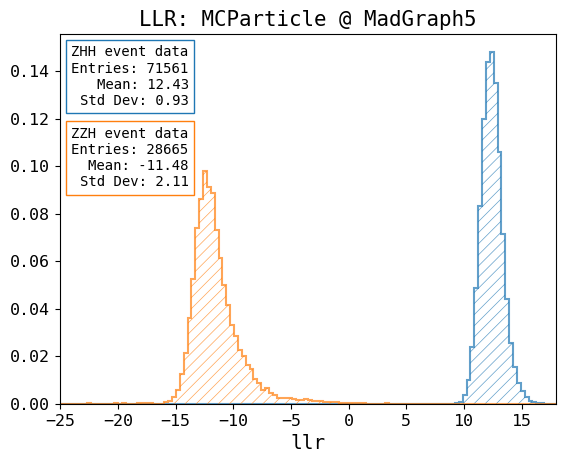

KeyError: 'llr'

In [12]:
from analysis.plot_routines import plot_llr
plot_llr(mcp, "MCParticle @ Physsim", llr_column='llr')

In [5]:
data = mcp[mcp["is_zhh"] == 1]
#a_raw = np.sqrt(data["jet1_e"]**2 - ( data["jet1_px"]**2 + data["jet1_py"]**2 + data["jet1_pz"]**2))
a_raw = np.sqrt(( data["parton1_px"]**2 + data["parton1_py"]**2 + data["parton1_pz"]**2))
a = a_raw[~a_raw.isna()]

In [6]:
np.average(a[(a > 0)])

85.258514

<Axes: ylabel='Count'>

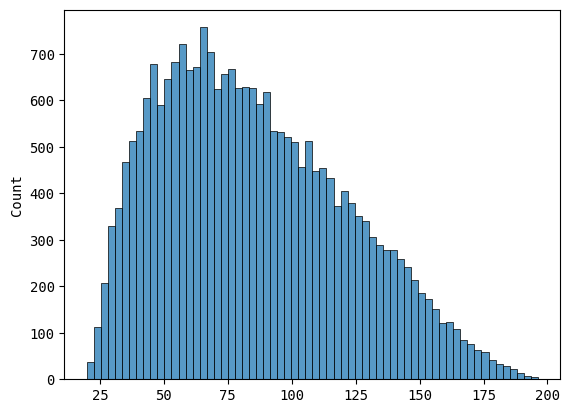

In [7]:
sns.histplot(a[(a > 0)], bins=64)

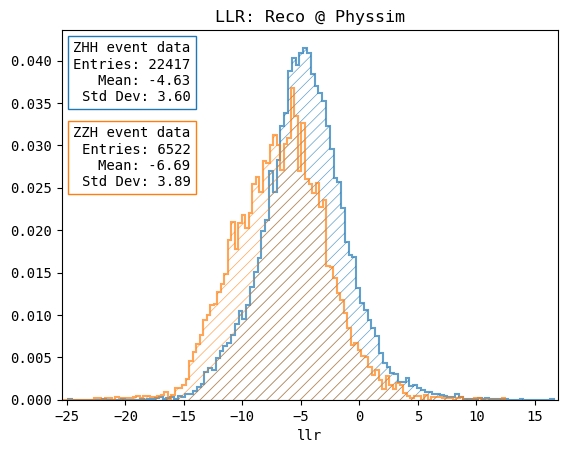

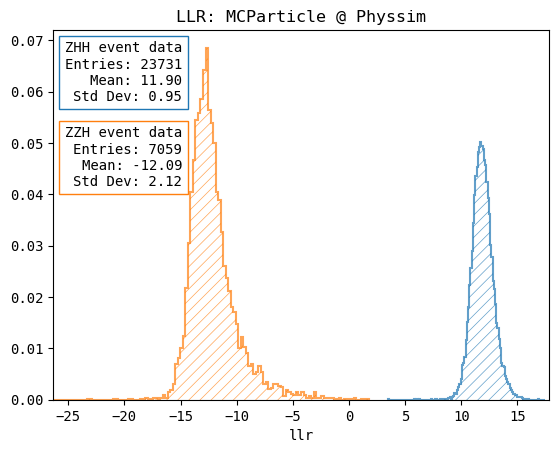

In [10]:
plot_llr(reco, "Reco @ Physsim")
plot_llr(mcp, "MCParticle @ Physsim")

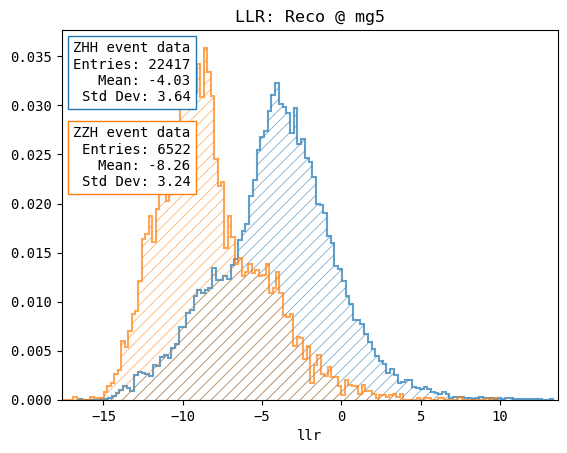

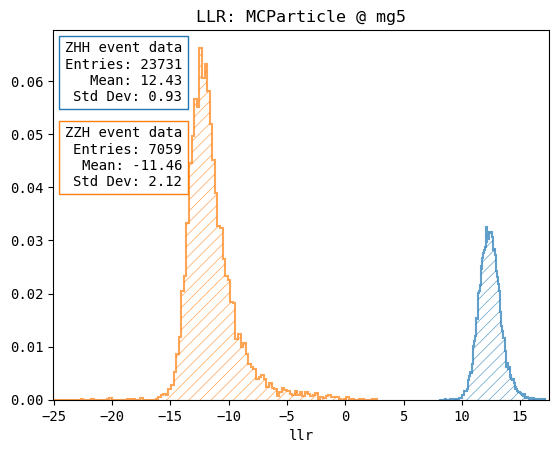

In [7]:
plot_llr(reco, "Reco @ mg5", llr_column='llr_mg5')
plot_llr(mcp, "MCParticle @ mg5", llr_column='llr_mg5')